# ML Practical 1 - Samuel Clarke 2346337

## Import modules and load data

In [1]:
import _pickle as cp
import numpy as np
import matplotlib.pyplot as plt

X, y = cp.load(open('winequality-white.pickle', 'rb'))

## Tasks 1-3

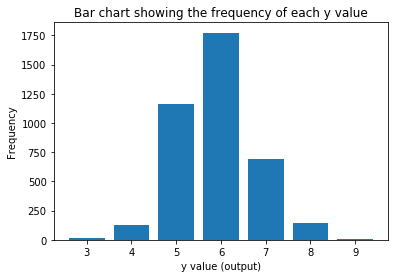

Mean of outputs of training data is 5.8788

MSE on training data is 0.7768
MSE on test data is 0.8139

Using linear regression, MSE on training data is 0.7261
MSE on test data is 0.7219


In [2]:
N, D = X.shape
N_train = int(0.8 * N)
N_test = N - N_train

X_train = X[:N_train]
y_train = y[:N_train]
X_test = X[N_train:]
y_test = y[N_train:]

# Task 1
fig1 = plt.figure(1)
y_values, frequencies = np.unique(y_train, return_counts=True)
plt.bar(y_values, frequencies)
plt.title('Bar chart showing the frequency of each y value')
plt.ylabel('Frequency')
plt.xlabel('y value (output)')
display(fig1)
plt.close()

# Task 2 - find MSE for most basic of predictors - average y
mean_train = np.mean(y_train)
mse_train_ave_y = ((y_train - mean_train)**2).mean()
mse_test_ave_y = ((y_test - mean_train)**2).mean()
print('Mean of outputs of training data is {:.4f}'.format(mean_train))
print()
print('MSE on training data is {:.4f}'.format(mse_train_ave_y))
print('MSE on test data is {:.4f}'.format(mse_test_ave_y))
print()

# Task 3 - standardise data and find MSE for least squares regression model
X_train_std = np.zeros((X_train.shape))
X_test_std = np.zeros((X_test.shape))
for feature in range(X_train.shape[1]):
    mean = X_train[:,feature].mean()
    std = X_train[:,feature].std()
    X_train_std[:,feature] = (X_train[:,feature] - mean) / std
    X_test_std[:,feature] = (X_test[:,feature] - mean) / std

y_train_std = (y_train - y_train.mean()) / y_train.std()
y_test_std = (y_test - y_train.mean()) / y_train.std()

# Fit the linear model
XtX_inv = np.linalg.inv(np.dot(X_train_std.transpose(), X_train_std))
XtX_inv_Xt = np.dot(XtX_inv, X_train_std.transpose())
weights = np.dot(XtX_inv_Xt, y_train_std)

y_hat_train = np.dot(X_train_std, weights)
y_hat_test = np.dot(X_test_std, weights)

# Find MSE for training and test data
mse_train_LS = ((y_train_std - y_hat_train)**2).mean()
mse_test_LS = ((y_test_std - y_hat_test)**2).mean()
print('Using linear regression, MSE on training data is {:.4f}'.format(mse_train_LS))
print('MSE on test data is {:.4f}'.format(mse_test_LS))

## Task 4

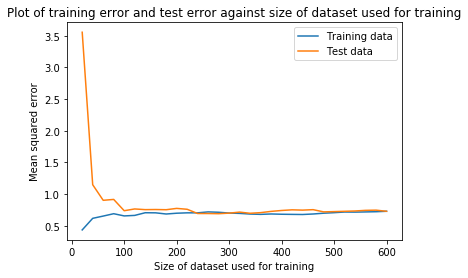

In [3]:
def fit_model(X, N_train):
    N, D = X.shape
    N_test = N - N_train
    assert N_train <= N

    X_train = X[:N_train]
    y_train = y[:N_train]
    X_test = X[N_train:]
    y_test = y[N_train:]

    # Standardise data
    X_train_std = np.zeros((X_train.shape))
    X_test_std = np.zeros((X_test.shape))
    for feature in range(X_train.shape[1]): # possibly a more elegant np way to do this w axes...
        mean = X_train[:,feature].mean()
        std = X_train[:,feature].std()
        X_train_std[:,feature] = (X_train[:,feature] - mean) / std
        X_test_std[:,feature] = (X_test[:,feature] - mean) / std

    y_train_std = (y_train - y_train.mean()) / y_train.std()
    y_test_std = (y_test - y_train.mean()) / y_train.std()    

    # Fit the linear model
    XtX_inv = np.linalg.inv(np.dot(X_train_std.transpose(), X_train_std))
    XtX_inv_Xt = np.dot(XtX_inv, X_train_std.transpose())
    weights = np.dot(XtX_inv_Xt, y_train_std)

    y_hat_train = np.dot(X_train_std, weights)
    y_hat_test = np.dot(X_test_std, weights)

    # Find MSE for training and test data
    mse_train_LS = ((y_train_std - y_hat_train)**2).mean()
    mse_test_LS = ((y_test_std - y_hat_test)**2).mean()

    # return mean squared error on train and test set from fitting model using least squares regression
    return mse_train_LS, mse_test_LS

training_set_sizes = range(20, 601, 20)
training_error, test_error = [], []
for training_set_size in training_set_sizes:
    # "training error on data" used means on data used for training
    mse_train, mse_test = fit_model(X, training_set_size)
    training_error.append(mse_train)
    # "test error on full test set" just means on inputs used for testing
    test_error.append(mse_test)
fig2 = plt.figure(2)
plt.plot(list(training_set_sizes), training_error, label='Training data')
plt.plot(list(training_set_sizes), test_error, label='Test data')
plt.title('Plot of training error and test error against size of dataset used for training')
plt.ylabel('Mean squared error')
plt.xlabel('Size of dataset used for training')
plt.legend(loc='upper right')
display(fig2)
plt.close()

The convergence of the error on the training and test data tell us that the model is not </i>overfitting</i>, because in this case the test error would be higher than the training error. However, we cannot be sure just from this plot whether underfitting is occurring or the model is a good fit. One idea would be to train a more complex model (e.g. use polynomial basis expansion) to see whether the mean squared error at the point where training and test error converge is lower than the error for the linear model. If it is, then the current model is underfitting to a certain extent.
With this model, a datasize of approximately 220 training examples is necessary to get optimal test error.

## (Optional) Polynomial Basis Expansion with Ridge and Lasso

### Partition data into training/validation and test sets

In [4]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import numpy as np
from scipy.stats import mode

N, D = X.shape
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.8)

### Construct ridge regression and lasso model pipelines

In [5]:
ridge_pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(2, include_bias=True), linear_model.Ridge())
lasso_pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(2), linear_model.Lasso())

### Find optimal values for $\lambda$ for ridge and lasso

I find optimal lambdas for 10 random partitions of X_train_val and y_train_val into training and validation sets, and take the optimal lambda to be the mode

In [6]:
lambdas = [0.01, 0.1, 1, 10, 100]
best_lambdas_ridge = []
best_lambdas_lasso = []

for _ in range(10):
    X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, test_size=0.8)
    ridge_scores = []
    lasso_scores = []
    for lmbda in lambdas:
        # update lambda
        ridge_pipeline.set_params(ridge__alpha=lmbda)
        lasso_pipeline.set_params(lasso__alpha=lmbda)
        # fit the model
        ridge_pipeline.fit(X_train, y_train)
        lasso_pipeline.fit(X_train, y_train)
        # compute error
        ridge_score = ridge_pipeline.score(X_validate, y_validate)
        lasso_score = lasso_pipeline.score(X_validate, y_validate)
        ridge_scores.append(ridge_score)
        lasso_scores.append(lasso_score)
    best_lambdas_ridge.append(lambdas[np.argmax(ridge_scores)])
    best_lambdas_lasso.append(lambdas[np.argmax(lasso_scores)])
    
lambda_ridge = mode(best_lambdas_ridge)[0][0]
lambda_lasso = mode(best_lambdas_lasso)[0][0]

print('Optimal lambda for ridge regression: {}'.format(lambda_ridge))
print('Optimal lambda for lasso: {}'.format(lambda_lasso))

Optimal lambda for ridge regression: 100
Optimal lambda for lasso: 0.1


###  Train models using these hyperparameters on the full training set


In [7]:
# Set hyperparameters
ridge_pipeline.set_params(ridge__alpha=lambda_ridge)
lasso_pipeline.set_params(lasso__alpha=lambda_lasso)

# Train models using full training set
ridge_pipeline.fit(X_train_val, y_train_val)
lasso_pipeline.fit(X_train_val, y_train_val)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lasso', Lasso(alpha=0.10000000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False))])

### Report the training and test error

Because pipeline objects have a convenient score() method that takes care of the standarisation automatically when computing error, I will use that for the computation. The sklearn implementation of score() for Ridge and Lasso is the coefficient of determination R^2. It is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). Therefore, to convert the output of the score() method into the mean squared error, I compute v * (1 - R^2) / len(y).

In [8]:
# coefficients of determination R^2 for each prediction
r2_ridge_train = ridge_pipeline.score(X_train_val, y_train_val)
r2_ridge_test = ridge_pipeline.score(X_test, y_test)
r2_lasso_train = lasso_pipeline.score(X_train_val, y_train_val)
r2_lasso_test = lasso_pipeline.score(X_test, y_test)

# total sum of squares for training and test sets
v_train = ((y_train_val - y_train_val.mean()) ** 2).sum()
v_test = ((y_test - y_test.mean()) ** 2).sum()

# MSE
mse_ridge_train = (v_train * (1 - r2_ridge_train)) / len(y_train_val)
mse_ridge_test = (v_test * (1 - r2_ridge_test)) / len(y_test)
mse_lasso_train = (v_train * (1 - r2_lasso_train)) / len(y_train_val)
mse_lasso_test = (v_test * (1 - r2_lasso_test)) / len(y_test)

print('Ridge regression:')
print('Training error: {}'.format(mse_ridge_train))
print('Test error: {}'.format(mse_ridge_test))
print('Lasso:')
print('Training error: {}'.format(mse_lasso_train))
print('Test error: {}'.format(mse_lasso_test))

Ridge regression:
Training error: 0.4783061114946908
Test error: 0.6200809778967343
Lasso:
Training error: 0.5866616226046217
Test error: 0.6257093625750307


### Final comments

The MSE values are not much better than for plain old Least Squares. This may be because I am regularising on the bias terms (there is a column of 1's added automatically in the basis expansion step of the pipeline) as well as on the weights. Regularising on bias terms is generally not a good idea, because there is no reason to penalise large bias. Since the bias is applied to every input equally, too large a bias could not possibly be a source of overfitting.